In [1]:
from sklearn.ensemble import RandomForestRegressor
## Install XGBOOST in the Anaconda envo using:  conda install -c conda-forge xgboost 
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from statistics import mean
import seaborn as sns 
%matplotlib inline 
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import pearsonr
from sklearn import tree, linear_model
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from timeit import default_timer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [3]:
# Read the data into a data frame
supData = pd.read_csv("train.csv", delimiter=",")
print("length of supData: ", len(supData))
# Check the number of features in the data set
print("features in the data set: ", len(supData.columns))
# Check the data types
print("data type: ", supData.dtypes.unique())

# Check any number of columns with NaN
print("Check NaN in coloumn : ", supData.isnull().any().sum(), ' / ', len(supData.columns))
# Check any number of data points with NaN
print("Check NaN in rows : ", supData.isnull().any(axis=1).sum(), ' / ', len(supData))


# Read the unique_m.csv data
supData_ele = pd.read_csv("unique_m.csv", delimiter=",")
supData_ele_ = supData_ele[['Cu','O','Fe','material']] # select columns contain Cu, O, Fe

bigdata =pd.concat([supData, supData_ele_], axis=1) # To merge across columns
print("length of bigdata: ", len(bigdata))
#bigdata.to_csv('file_name.csv', sep='\t') # To save the output data to a .csv file

supData_ele_Cu = bigdata.loc[~bigdata['Cu'].isin(['0'])] # Delete 0 for the Cu column
supData_ele_O = bigdata.loc[~bigdata['O'].isin(['0'])] # Delete 0 for the O column
supData_ele_Fe = bigdata.loc[~bigdata['Fe'].isin(['0'])] # Delete 0 for the Fe column




print("length Cu: ", len(supData_ele_Cu), "length of O: ", len(supData_ele_O), "length of Fe", len(supData_ele_Fe))
#supData_ele_Cu.to_csv('file_name_Cu.csv', sep='\t') # To save the output data to a .csv file
#supData_ele_O.to_csv('file_name_O.csv', sep='\t') # To save the output data to a .csv file
#supData_ele_Fe.to_csv('file_name_Fe.csv', sep='\t') # To save the output data to a .csv file

length of supData:  21263
features in the data set:  82
data type:  [dtype('int64') dtype('float64')]
Check NaN in coloumn :  0  /  82
Check NaN in rows :  0  /  21263
length of bigdata:  21263
length Cu:  10838 length of O:  11964 length of Fe 2339


In [3]:
def load_Data(Data):
    myData = pd.DataFrame(Data)
    #--------------
    # Extract features and target data
    target = myData.iloc[:,-5] # get the 5th column from the last of the data frame
    features = myData.drop(['critical_temp','Cu', 'O', 'Fe','material'], axis=1)
    features_normalized = preprocessing.normalize(features, norm='l2', axis=1, copy=True, return_norm=False)

    X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.33) #, random_state=42
    #return X_train, X_test, y_train, y_test, features, target #return already normalized features.
    
    return X_train, X_test, y_train, y_test


def Grid_Search_CV_XGB(X_train, y_train):
    estimator = xgb.XGBRegressor()

    parameters = {'n_estimators': [200], 
              'learning_rate': [0.1], 
               'gamma': [0],
              'max_depth': [7], 
              'subsample': [0.75],
              'colsample_bytree': [1],
              'booster': ['gbtree', 'dart'],
             }

    grid = GridSearchCV(estimator, parameters, n_jobs=-1, cv=40)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def XGB(X_train, X_test, y_train, y_test, best_params):
    estimator = xgb.XGBRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    return y_test,y_predict

iteration:  0
--------------
Best Score: 0.8518659443659024
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  1
--------------
Best Score: 0.8532320860777389
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  2
--------------
Best Score: 0.8526011459592663
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  3
--------------
Best Score: 0.8466345795503817
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  4
--------------
Best Score: 0.8496704414254267
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_e

/home/m/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Average of RMSE:  12.531607051815916
Average of best_score:  0.8508008394757431
Average of R2:  0.8552534934737903
----------------------------


Text(336.9714285714286, 0.5, 'Predicted Critical Temperature (K)')

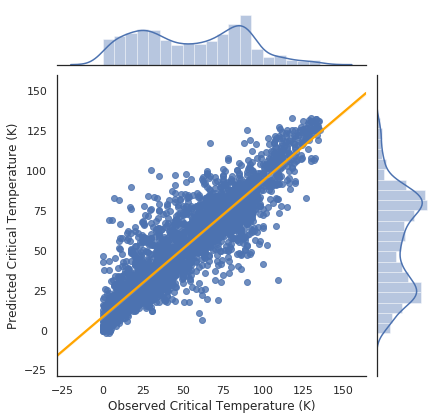

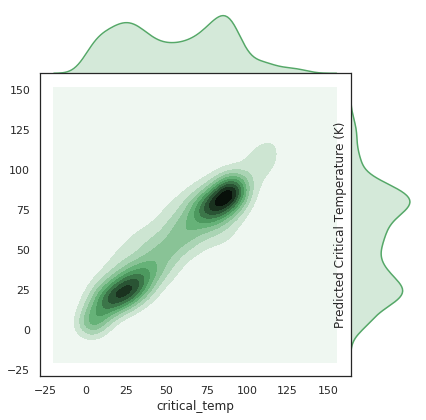

In [50]:
## Oxygen based superconductors
RMSE = []
R2 = []
BEST_SCORE = []
for i in range(5):
    print ("iteration: " , i)
    print ("--------------")
    X_train, X_test, y_train, y_test = load_Data(supData_ele_O)
    best_score, best_params = Grid_Search_CV_XGB(X_train, y_train)
    y_test , y_predict = XGB(X_train, X_test, y_train, y_test, best_params)
    rmse = math.sqrt(np.mean((y_predict - y_test) ** 2))
    r2 = r2_score(y_test,y_predict)
    RMSE.append(rmse)
    R2.append(r2)
    BEST_SCORE.append(best_score)

    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)
    

sns.set(style="white", color_codes=True)
g = sns.jointplot(y_test, y_predict, kind='reg', joint_kws={'line_kws':{'color':'orange'}})


plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)
plt.xlabel('Observed Critical Temperature (K)', fontsize=12)
print("Average of RMSE: ", mean(RMSE))
print("Average of best_score: ", mean(BEST_SCORE))
print("Average of R2: ", mean(R2))  
print("----------------------------")
gg = sns.jointplot(y_test, y_predict, kind="kde", space=0, color="g")
plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)

iteration:  0
--------------
Best Score: 0.8353311005787254
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  1
--------------
Best Score: 0.8303119821910747
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  2
--------------
Best Score: 0.833949765451548
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  3
--------------
Best Score: 0.835992574260725
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  4
--------------
Best Score: 0.8355478943477087
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estim

/home/m/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Average of RMSE:  12.842991296454773
Average of best_score:  0.8342266633659564
Average of R2:  0.8402012268269033
----------------------------


Text(336.9714285714286, 0.5, 'Predicted Critical Temperature (K)')

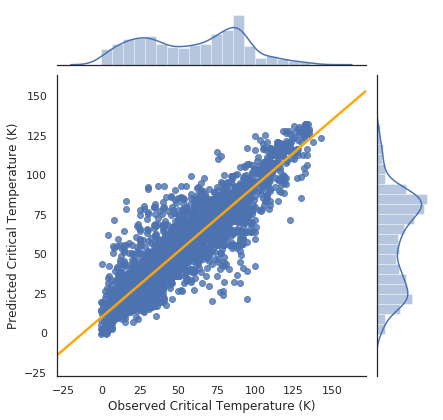

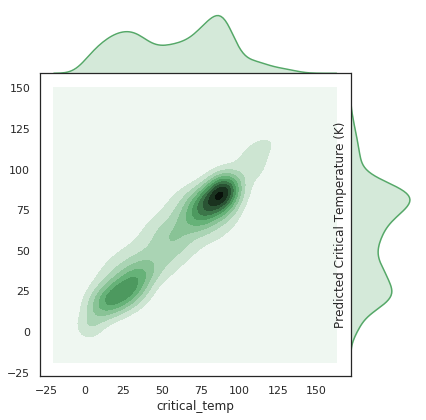

In [38]:
## Copper based superconductors
RMSE = []
R2 = []
BEST_SCORE = []
for i in range(5):
    print ("iteration: " , i)
    print ("--------------")
    X_train, X_test, y_train, y_test = load_Data(supData_ele_Cu)
    best_score, best_params = Grid_Search_CV_XGB(X_train, y_train)
    y_test , y_predict = XGB(X_train, X_test, y_train, y_test, best_params)
    rmse = math.sqrt(np.mean((y_predict - y_test) ** 2))
    r2 = r2_score(y_test,y_predict)
    RMSE.append(rmse)
    R2.append(r2)
    BEST_SCORE.append(best_score)

    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)
    
sns.set(style="white", color_codes=True)
g = sns.jointplot(y_test, y_predict, kind='reg', joint_kws={'line_kws':{'color':'orange'}})

y_test.to_csv('y_test.csv', sep='\t')

plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)
plt.xlabel('Observed Critical Temperature (K)', fontsize=12)
print("Average of RMSE: ", mean(RMSE))
print("Average of best_score: ", mean(BEST_SCORE))
print("Average of R2: ", mean(R2)) 
print("----------------------------")
gg = sns.jointplot(y_test, y_predict, kind="kde", space=0, color="g")
plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)

iteration:  0
--------------
Best Score: 0.8115680440521662
Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  1
--------------
Best Score: 0.7989136397363448
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  2
--------------
Best Score: 0.8046061762524357
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  3
--------------
Best Score: 0.8319779319536446
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}
iteration:  4
--------------
Best Score: 0.8138593484888812
Best params: {'booster': 'dart', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estim

/home/m/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(336.9714285714286, 0.5, 'Predicted Critical Temperature (K)')

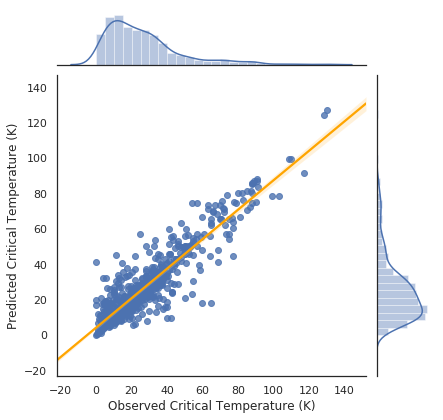

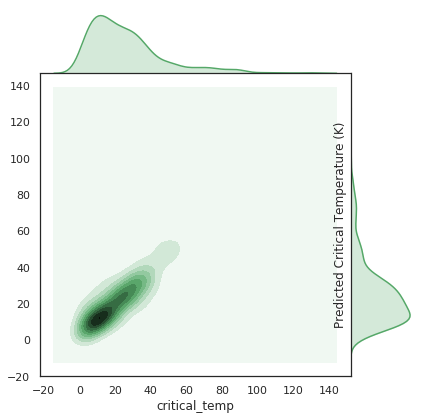

In [39]:
## Fe based superconductors
RMSE = []
R2 = []
BEST_SCORE = []
for i in range(5):
    print ("iteration: " , i)
    print ("--------------")
    X_train, X_test, y_train, y_test = load_Data(supData_ele_Fe)
    best_score, best_params = Grid_Search_CV_XGB(X_train, y_train)
    y_test , y_predict = XGB(X_train, X_test, y_train, y_test, best_params)
    rmse = math.sqrt(np.mean((y_predict - y_test) ** 2))
    r2 = r2_score(y_test,y_predict)
    RMSE.append(rmse)
    R2.append(r2)
    BEST_SCORE.append(best_score)

    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)
    

sns.set(style="white", color_codes=True)
g = sns.jointplot(y_test, y_predict, kind='reg', joint_kws={'line_kws':{'color':'orange'}})


plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)
plt.xlabel('Observed Critical Temperature (K)', fontsize=12)
print("Average of RMSE: ", mean(RMSE))
print("Average of best_score: ", mean(BEST_SCORE))
print("Average of R2: ", mean(R2))  
print("----------------------------")
gg = sns.jointplot(y_test, y_predict, kind="kde", space=0, color="g")
plt.ylabel('Predicted Critical Temperature (K)', fontsize=12)